# AI Creative Showcase: Text → Emotion → Image

Welcome to your final AI project! In this notebook, you will create a short story, detect its emotion, and generate an image based on it. By the end, you'll have a mini “AI storybook”!

The goal would be to write a short scene or idea (e.g., “A friendly dragon in a candy forest”) and see how AI expands it!

Here I will provide you with an skeleton code that you can modify with the models and parameters of your choice. Show what you've learned so far!

- Try **different story prompts** and see how emotion and image change.
- Compare story **emotion** with the AI-generated image mood.
- Challenge: Make a **happy story with a scary-looking image**!
- You can try to create an storybook with multiple scenes too.

### Extra Tips:
- Use **short, clear prompts** for text generation.
- Include **adjectives** in image prompts to influence style.
- Compare different **emotion detection models** for fun variations.


---

### Story Generation Script

In [16]:
from transformers import pipeline

# Load GPT-2 text generation model
generator = pipeline("text-generation", model="gpt2")

def generate_story(prompt):
    result = generator(prompt, max_new_tokens=50, do_sample=True, temperature=0.8)
    story = result[0]['generated_text']
    print("Your AI story:")
    print(story)
    print("-"*40)
    return story

# Example usage
prompt = "A young wizard discovers a hidden power within himself."
story = generate_story(prompt)


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: a5e79e4a-e9fa-4cc6-8ca3-073bc329edd5)')' thrown while requesting HEAD https://huggingface.co/gpt2/resolve/main/generation_config.json
Retrying in 1s [Retry 1/5].
Device set to use mps:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Your AI story:
A young wizard discovers a hidden power within himself.

One day, a young wizard discovers a hidden power within himself. A young wizard's life is changed forever.

More than anything else, the world is filled with danger!

A young wizard discovers a hidden power within himself.
----------------------------------------


### Detect Story Emotion

In [17]:
from transformers import pipeline

# Load sentiment/emotion model
emotion_analyzer = pipeline("sentiment-analysis")

def detect_emotion(text):
    results = emotion_analyzer(text)
    print("Emotion analysis:")
    for r in results:
        print(f"{r['label']} ({r['score']*100:.1f}%)")
    print("-"*40)

# Analyze the AI-generated story
detect_emotion(story)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


Emotion analysis:
POSITIVE (99.9%)
----------------------------------------


### Generate an Image

Generating: A young wizard discovers a hidden power within himself.


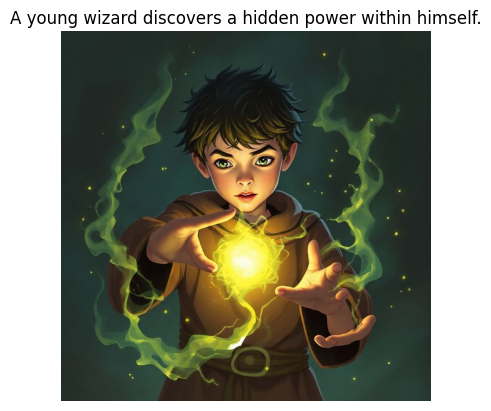

In [18]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Prompt for image generation
print(f"Generating: {prompt}")

# Pollinations API (no key needed)
url = f"https://image.pollinations.ai/prompt/{prompt}"

# Fetch image
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Display
plt.imshow(image)
plt.axis("off")
plt.title(prompt)
plt.show()
